## Ramen Ratings Data Analysis

In [1]:
print('Hello World')

Hello World


### Question & Hypotheses

1. Which country produces the highest rated ramen?
    - Hypothesis: Japanese ramen brands generally receive higher ratings than brands from other countries
2. Do the ratings scores vary widely in this dataset?
3. Who are the most and least reviewed brands?
    - Hypothesis: A few popular brands are rated far more than others
4. Which brands most consistently receive high average ratings?
5. Does the style of ramen (e.g. cup, bowl, pack) affect its rating?
    - Hypothesis: Ramen served in unusual styles like bottle or can will have lower ratings and traditional styles like box will have the highest ratings

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('../data/Top_Ramen_Ratings.csv')

df.head()

,Review #,Brand,Variety,Style,Country,Stars,T
0,4120,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3,NaN
1,4119,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.5,NaN
2,4118,Binh Tay,Mi Kiwi,Bowl,Vietnam,3,NaN
3,4117,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.5,NaN
4,4116,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75,NaN


In [4]:
df.shape

(4120, 7)

In [5]:
df.tail()

,Review #,Brand,Variety,Style,Country,Stars,T
4115,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
4116,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
4117,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
4118,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN
4119,1,Westbrae,Miso Ramen,Pack,United States,0.5,NaN


In [6]:
df.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          0
T           4120
dtype: int64

In [7]:
# Option 1
#df.drop('T', axis='columns', inplace=True)

# Option 2
# df.drop('T', axis=1, inplace=True)

df.head()

,Review #,Brand,Variety,Style,Country,Stars,T
0,4120,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3,NaN
1,4119,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.5,NaN
2,4118,Binh Tay,Mi Kiwi,Bowl,Vietnam,3,NaN
3,4117,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.5,NaN
4,4116,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4120 non-null   int64  
 1   Brand     4120 non-null   object 
 2   Variety   4120 non-null   object 
 3   Style     4120 non-null   object 
 4   Country   4120 non-null   object 
 5   Stars     4120 non-null   object 
 6   T         0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 225.4+ KB


In [9]:
df['Stars'].value_counts()

Stars
5          775
3.5        607
3.75       581
4          489
4.5        282
3.25       236
4.25       223
3          191
2.75       118
2          104
4.75       103
2.5        102
1.5         54
1           44
0           44
1.75        33
2.25        32
0.5         24
0.25        21
1.25        16
Unrated      3
NR           3
0.75         2
4.125        2
3.1          2
2.8          2
1.1          2
4.25/5       2
2.9          2
3.4          1
3.65         1
3.6          1
3.7          1
2.85         1
2.125        1
0.1          1
2.3          1
3.2          1
5/5          1
3.125        1
0.9          1
2.1          1
3.50         1
5/4          1
5/2.5        1
4.5/5        1
4/4          1
3.5/2.5      1
NS           1
1.8          1
Name: count, dtype: int64

In [10]:
no_stars_msk = (df['Stars'] == 'NR') | (df['Stars'] == 'Unrated') | (df['Stars'] == 'NS')
df_no_rating_rows = df[no_stars_msk]
df_no_rating_rows

,Review #,Brand,Variety,Style,Country,Stars,T
687,3433,Base Foods,Base Noodles,Pack,United States,NS,NaN
970,3150,Hakubaku,Baby Somen,Pack,Japan,NR,NaN
971,3149,Hakubaku,Baby Udon,Pack,Japan,NR,NaN
1479,2641,Nanoblock,Ramen Bokki,Pack,Japan,NR,NaN
1572,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated,NaN
1662,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated,NaN
2533,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated,NaN


In [11]:
df = df[~no_stars_msk]

df.shape

(4113, 7)

In [12]:
df['Stars'] = df['Stars'].str.replace(r'/.*', '', regex=True)

In [13]:
df['Stars'].value_counts()

Stars
5        778
3.5      608
3.75     581
4        490
4.5      283
3.25     236
4.25     225
3        191
2.75     118
2        104
4.75     103
2.5      102
1.5       54
0         44
1         44
1.75      33
2.25      32
0.5       24
0.25      21
1.25      16
3.1        2
2.8        2
2.9        2
4.125      2
0.75       2
1.1        2
0.9        1
2.1        1
3.125      1
2.125      1
0.1        1
3.50       1
3.7        1
3.4        1
3.6        1
2.85       1
2.3        1
3.2        1
3.65       1
1.8        1
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4113 entries, 0 to 4119
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4113 non-null   int64  
 1   Brand     4113 non-null   object 
 2   Variety   4113 non-null   object 
 3   Style     4113 non-null   object 
 4   Country   4113 non-null   object 
 5   Stars     4113 non-null   object 
 6   T         0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 257.1+ KB


In [15]:
df['Stars'] = pd.to_numeric(df['Stars'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4113 entries, 0 to 4119
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4113 non-null   int64  
 1   Brand     4113 non-null   object 
 2   Variety   4113 non-null   object 
 3   Style     4113 non-null   object 
 4   Country   4113 non-null   object 
 5   Stars     4113 non-null   float64
 6   T         0 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 257.1+ KB


In [16]:
df = df[(df['Stars'] >= 0) & (df['Stars'] <= 5)]
df.shape

(4113, 7)

In [17]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,T
0,4120,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3.00,NaN
1,4119,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.50,NaN
2,4118,Binh Tay,Mi Kiwi,Bowl,Vietnam,3.00,NaN
3,4117,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.50,NaN
4,4116,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75,NaN


In [18]:
unique_countries_sorted = sorted(df['Country'].unique())
unique_countries_sorted

['Australia',
 'Bangladesh',
 'Brazil',
 'Cambodia',
 'Canada',
 'China',
 'Colombia',
 'Dubai',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Germany',
 'Ghana',
 'Holland',
 'Hong Kong',
 'Hungary',
 'India',
 'Indonesia',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Malaysia',
 'Mexico',
 'Myanmar',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Pakistan',
 'Peru',
 'Philippines',
 'Phlippines',
 'Poland',
 'Portugal',
 'Russia',
 'Russian Federation',
 'Sarawak',
 'Serbia',
 'Singapore',
 'Souh Korea',
 'South Korea',
 'Spain',
 'Sweden',
 'Taiwan',
 'Thailand',
 'UK',
 'USA',
 'Ukraine',
 'United Kingdom',
 'United States',
 'Vietnam']

In [19]:
countries = {
    'Holland': 'Netherlands',
    'Phlippines': 'Philippines',
    'Russian Federation': 'Russia',
    'Souh Korea': 'South Korea',
    'Sarawak': 'Malaysia',
    'UK': 'United Kingdom',
    'USA': 'United States'
}

df['Country'] = df['Country'].replace(countries)

In [20]:
df['Country'].value_counts()

Country
Japan             797
United States     570
South Korea       428
Taiwan            405
China             286
Thailand          233
Malaysia          230
Hong Kong         205
Indonesia         175
Singapore         144
Vietnam           129
United Kingdom     77
Canada             56
Philippines        54
India              46
Germany            38
Mexico             32
Australia          25
Brazil             24
Netherlands        20
Myanmar            14
Nepal              14
Pakistan           13
Bangladesh         12
Hungary             9
Russia              7
France              6
Colombia            6
Poland              6
Cambodia            5
Serbia              5
Italy               4
Peru                4
Fiji                4
Ireland             4
Sweden              3
Finland             3
Israel              3
Ukraine             3
Spain               3
Dubai               3
Ghana               2
Nigeria             2
Estonia             2
New Zealand         1
Po

In [21]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,T
0,4120,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3.00,NaN
1,4119,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.50,NaN
2,4118,Binh Tay,Mi Kiwi,Bowl,Vietnam,3.00,NaN
3,4117,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.50,NaN
4,4116,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75,NaN


In [22]:
unique_brands_sorted = sorted(df['Brand'].unique())
unique_brands_sorted

['1 To 3 Noodles',
 '7 Select',
 '7 Select/Nissin',
 '7-Eleven / Nissin',
 'A-One',
 'A-Sha',
 'A-Sha Dry Noodle',
 'A1',
 'ABC',
 'ABC President',
 'Acecook',
 'Aces',
 'Adabi',
 'Ah Lai',
 'Aji-no-men',
 'Ajinatori',
 'Ajinomoto',
 'Alhami',
 'Amianda',
 'Amino',
 "Annie Chun's",
 'Ao Ba Ba',
 'Aroi',
 'Artisan',
 'Asia Gold',
 'Asian Thai Foods',
 'Assi',
 'Atomy',
 'Authentically Asian',
 'Azami',
 'Baijia',
 'Baixiang',
 'Baixiang Noodles',
 'Baltix',
 'Baman',
 'Bamee',
 'Banzai',
 'Batchelors',
 'Being Blue',
 'Best Wok',
 'Big Bon',
 'Binh Tay',
 'Blount',
 'Bon Go Jang',
 'Bonasia',
 'Boss',
 'Bowlfull',
 'Boys & Girls',
 'Buitoni',
 'Burung Layang Terbang',
 'CJ CheilJedang',
 'COCO 2.0',
 "Campbell's",
 'Canton',
 'Cao Is Starving',
 'Cap Atoom Bulan',
 'CarJEN',
 'Charming Couple',
 "Chaudhary's Wai Wai",
 'Cheetos',
 "Chef Nic's Noodles",
 'Chef Woo',
 'Chencun',
 'Chering Chang',
 'Chewy',
 'Chikara',
 'Chil Kab Farm Products',
 'Chillies Brand',
 'China Best',
 "Ching's 

In [23]:
brand_names_map = {
    'A-Sha Dry Noodle':'A-Sha',
    'ABC President':'ABC',
    'Baixiang Noodles':'Baixiang',
    'ChoripDong':'Chorip Dong',
    'Fantastic Noodles':'Fantastic',
    'Fashion Foods':'Fashion Food',
    'Hua Feng Noodle Expert':'Hua Feng',
    'Ichiran Ramen':'Ichiran',
    'Lau Liu tou':'Lau Liu Tou',
    'Lishan Food Manufacturing':'Lishan',
    'Mr. Lee\'s Noodles':'Mr. Lee\'s',
    'Mr. Noodle':'Mr. Noodles',
    'Nakaki Foods':'Nakaki Food',
    'Nakaki':'Nakaki Food',
    'Nissin ':'Nissin',
    'Nissin Miojo':'Nissin',
    'Nissin-Miojo':'Nissin',
    "O'taste":'O\'Taste',
    "O\'Taste":'O\'Taste',
   'Sakurai Foods':'Sakurai',
    'Samurai Ramen':'Samurai',
    'Seven&I':'Seven & I',
    'Seven & i':'Seven & I',
    'Sugakiya Foods':'Sugakiya',
    'Tablemark':'TableMark',
    'Tasty ly':'Tasty.ly',
    'Thien Houng Foods':'Thien Houng Food',
    'Three Meters Noodles':'Three Meters',
    'Tseng Noodle':'Tseng Noodles',
    'Unif / Tung-I':'Unif',
    'Unif Tung-I':'Unif',
    'Unif-100':'Unif',
    'Yamamoto Seifun':'Yamamoto',
    'Weh Lih':'Wei Lih',
    'Wu Mu':'Wu-Mu',
    'World O Noodle':'World O\' Noodle'
}

df['Brand'] = df['Brand'].replace(brand_names_map)

unique_brands_sorted_renamed = sorted(df['Brand'].unique())
unique_brands_sorted_renamed

['1 To 3 Noodles',
 '7 Select',
 '7 Select/Nissin',
 '7-Eleven / Nissin',
 'A-One',
 'A-Sha',
 'A1',
 'ABC',
 'Acecook',
 'Aces',
 'Adabi',
 'Ah Lai',
 'Aji-no-men',
 'Ajinatori',
 'Ajinomoto',
 'Alhami',
 'Amianda',
 'Amino',
 "Annie Chun's",
 'Ao Ba Ba',
 'Aroi',
 'Artisan',
 'Asia Gold',
 'Asian Thai Foods',
 'Assi',
 'Atomy',
 'Authentically Asian',
 'Azami',
 'Baijia',
 'Baixiang',
 'Baltix',
 'Baman',
 'Bamee',
 'Banzai',
 'Batchelors',
 'Being Blue',
 'Best Wok',
 'Big Bon',
 'Binh Tay',
 'Blount',
 'Bon Go Jang',
 'Bonasia',
 'Boss',
 'Bowlfull',
 'Boys & Girls',
 'Buitoni',
 'Burung Layang Terbang',
 'CJ CheilJedang',
 'COCO 2.0',
 "Campbell's",
 'Canton',
 'Cao Is Starving',
 'Cap Atoom Bulan',
 'CarJEN',
 'Charming Couple',
 "Chaudhary's Wai Wai",
 'Cheetos',
 "Chef Nic's Noodles",
 'Chef Woo',
 'Chencun',
 'Chering Chang',
 'Chewy',
 'Chikara',
 'Chil Kab Farm Products',
 'Chillies Brand',
 'China Best',
 "Ching's Secret",
 'Chitato',
 'Chongqing Suanlabao Food Co., Ltd.',


In [24]:
country_avg = df.groupby('Country')['Stars'].mean().sort_values(ascending=False)
style_avg = df.groupby('Style')['Stars'].mean().sort_values(ascending=False)
brand_avg = df.groupby('Brand')['Stars'].mean().sort_values(ascending=False)

In [25]:
country_avg

Country
France            4.333333
Malaysia          4.201739
Cambodia          4.200000
Indonesia         4.122857
Singapore         4.109375
Spain             4.000000
Myanmar           3.946429
Taiwan            3.913457
Hong Kong         3.880488
South Korea       3.880140
Japan             3.876568
Fiji              3.875000
Brazil            3.645833
Hungary           3.611111
Mexico            3.609375
United States     3.587939
Ukraine           3.583333
Finland           3.583333
Dubai             3.583333
Russia            3.571429
China             3.563112
Germany           3.532895
Nepal             3.517857
Ghana             3.500000
Estonia           3.500000
Bangladesh        3.479167
Thailand          3.475322
India             3.456522
Philippines       3.407407
Peru              3.375000
Colombia          3.291667
Australia         3.260000
Sweden            3.250000
Vietnam           3.221318
Pakistan          3.192308
United Kingdom    3.116883
Poland            3.

In [26]:
style_avg

Style
Bar           5.000000
Box           4.262821
Bottle        4.000000
Pack          3.811710
Bowl          3.738708
Restaurant    3.583333
Tray          3.572115
Can           3.500000
Cup           3.493806
Name: Stars, dtype: float64

In [27]:
brand_avg

Brand
Torishi            5.0
Neo~Essence        5.0
Schylling          5.0
Tian Ling Ling     5.0
Seven & I          5.0
                  ... 
Hikari Miso        0.0
Isoyama Shoji      0.0
US Canning         0.0
Bowlfull           0.0
Dr. McDougall's    0.0
Name: Stars, Length: 580, dtype: float64

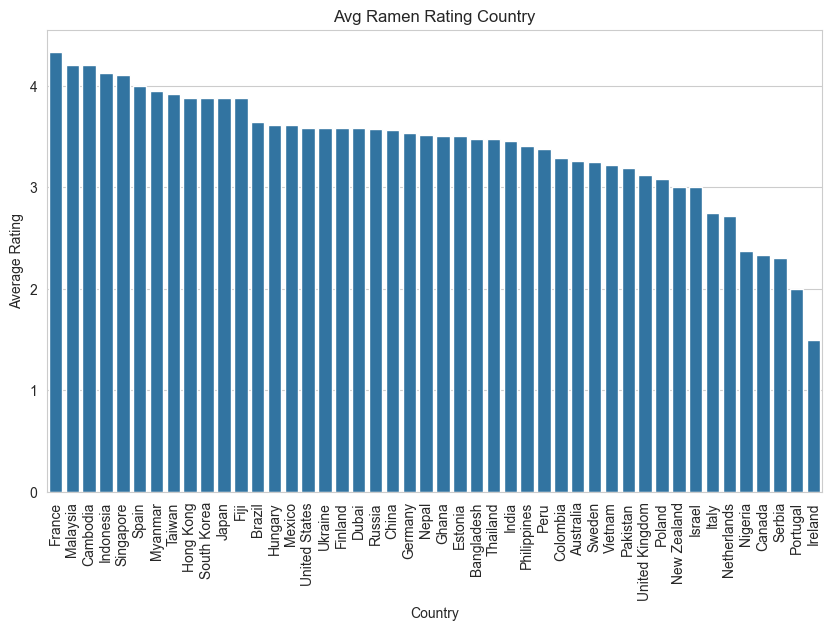

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=country_avg.index, y=country_avg.values)
plt.xticks(rotation=90)
plt.title('Avg Ramen Rating Country')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.show()

In [29]:
country_review_counts = df['Country'].value_counts()
print('Number of review from France:', country_review_counts.get('France', 0))

Number of review from France: 6


In [30]:
france_review = df[df['Country'] == 'France']
print(france_review[['Brand', 'Variety', 'Stars']])


               Brand                                Variety  Stars
637          Mr. Min      Original Korean Ramen Beef Flavor   4.25
659          Mr. Min  Original Korean Ramen Instant Noodles   5.00
943  Maison de Coree                 Ramen Gout Coco Poulet   3.75
950  Maison de Coree                   Ramen Gout Carbonara   4.00
967  Maison de Coree                   Ramen Gout BBQ Coree   5.00
975  Maison de Coree                  Ramen Gout Poulet Feu   4.00


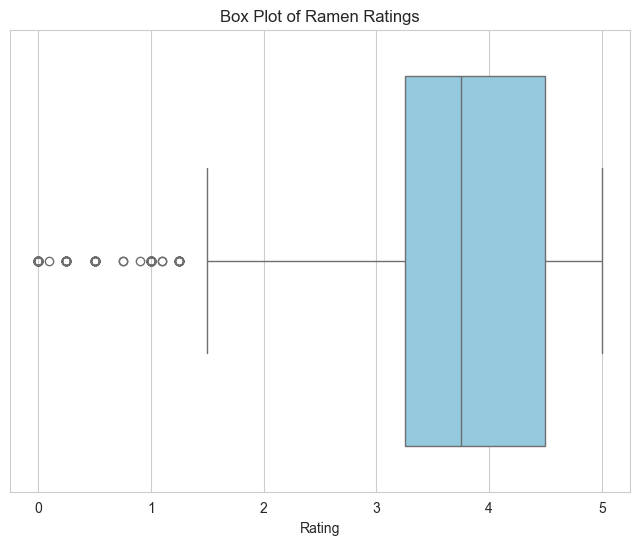

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Stars'], color='skyblue')
plt.title('Box Plot of Ramen Ratings')
plt.xlabel('Rating')
plt.show()

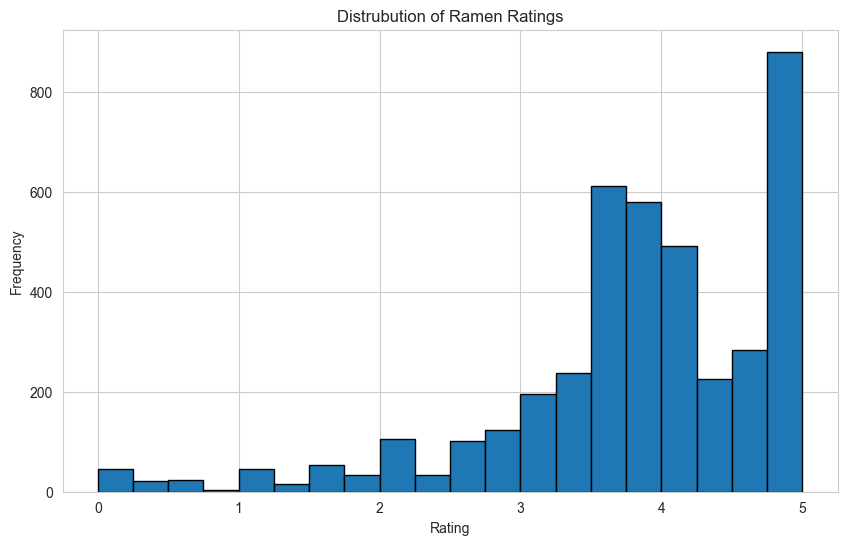

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df['Stars'], bins=20, edgecolor='black')
plt.title('Distrubution of Ramen Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [33]:
df['Stars'].describe()

count    4113.000000
mean        3.734780
std         1.043151
min         0.000000
25%         3.250000
50%         3.750000
75%         4.500000
max         5.000000
Name: Stars, dtype: float64

In [34]:
brand_reivew_counts = df['Brand'].value_counts()
brand_reivew_counts

Brand
Nissin           530
Maruchan         149
Myojo            133
Nongshim         126
Samyang Foods    103
                ... 
Fox                1
Saikebon           1
Rollton            1
Ajinomoto          1
Westbrae           1
Name: count, Length: 580, dtype: int64

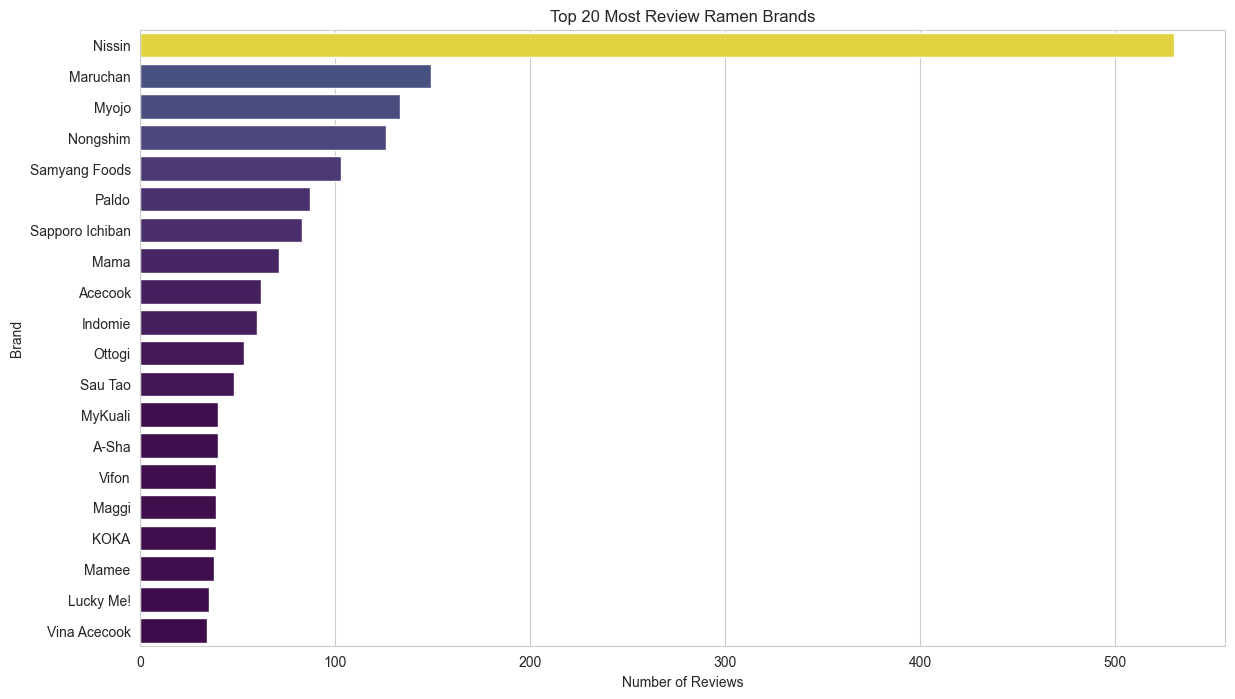

In [35]:
plt.figure(figsize=(14, 8))
sns.barplot(x=brand_reivew_counts.head(20).values, y=brand_reivew_counts.head(20).index, palette='viridis', legend=False, hue=brand_reivew_counts.head(20))
plt.title('Top 20 Most Review Ramen Brands')
plt.xlabel('Number of Reviews')
plt.ylabel('Brand')
plt.show()

In [36]:
brand_avg_ratings = df.groupby('Brand')['Stars'].mean()

brand_stats = pd.DataFrame({
    'Review_Counts': brand_reivew_counts,
    'Average_Ratin': brand_avg_ratings
})

print(brand_stats.sort_values(by='Review_Counts', ascending=False).head(10))

                 Review_Counts  Average_Ratin
Brand                                        
Nissin                     530       3.879953
Maruchan                   149       3.663591
Myojo                      133       3.909774
Nongshim                   126       4.039683
Samyang Foods              103       4.097087
Paldo                       87       4.043103
Sapporo Ichiban             83       3.737952
Mama                        71       3.628873
Acecook                     62       3.133065
Indomie                     60       4.016667


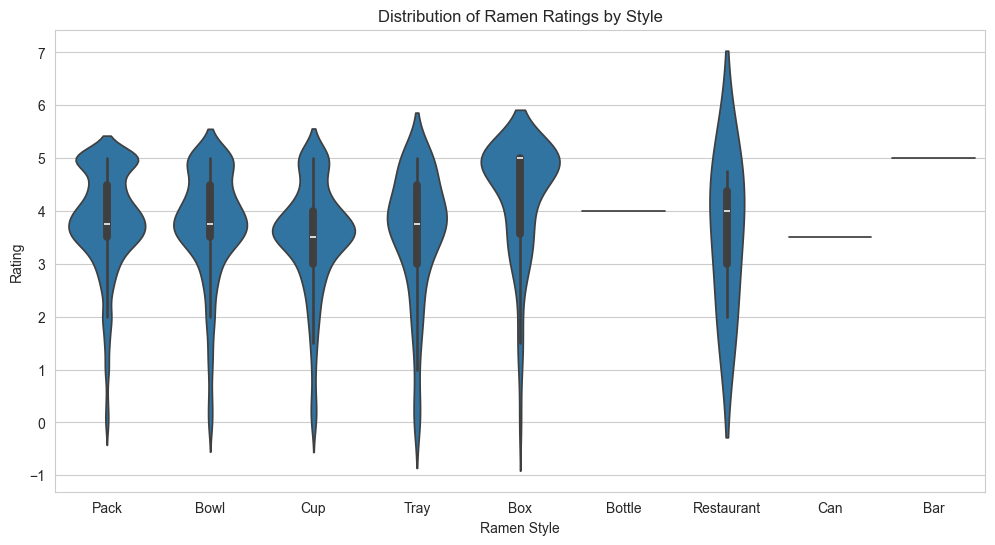

In [37]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Style', y='Stars', data=df)
plt.title('Distribution of Ramen Ratings by Style')
plt.xlabel('Ramen Style')
plt.ylabel('Rating')
plt.show()

#Key Findings

1. Question
    - Answer

#Possibilities for Future Analysis 

## Importan Considerations 
-
-
-
-
-

In [38]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,T
0,4120,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3.00,NaN
1,4119,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.50,NaN
2,4118,Binh Tay,Mi Kiwi,Bowl,Vietnam,3.00,NaN
3,4117,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.50,NaN
4,4116,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75,NaN


In [39]:
df.to_csv('test.csv', index=False)